## Adding the libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Cleaning

In [2]:
# Load the data
file_path = "output.csv"
df = pd.read_csv(file_path)

## Date cleaning

### Dropping rows with null values

In [3]:
# Drop rows with NaN values
df = df.dropna()

### Changing Dates

In [4]:
# # Convert 'Date' column to datetime type
# df['Date'] = pd.to_datetime(df['Date'])

# # Subtract 30 days from each date
# df['Date'] = df['Date'] - pd.Timedelta(days=30)

# # Output the updated DataFrame
# print(df['Date'])

### Takeoff Conversion from 12 hours format to 24 hours format

In [5]:
# Define the time-related columns
time_columns = ['Gate Departure Actual', 'Gate Departure Estimated', 'Takeoff Actual', 'Takeoff Estimated', 'Gate Arrival Actual', 'Gate Arrival Estimated', 'Landing Actual', 'Landing Estimated']

# Replace non-time values ('--') with NaN
df[time_columns] = df[time_columns].replace('--', pd.NA)

# Convert time columns to 24-hour format
for column in time_columns:
    # Convert to datetime objects
    df[column] = pd.to_datetime(df[column], errors='coerce')
    # Convert to 24-hour format
    df[column] = df[column].dt.strftime('%H:%M')

# Display the DataFrame after conversion
# print(df[time_columns])
print(df.head())

  Flight Number       Date           Taxi Takeoff  \
0       SWA2388  27-Mar-24  Taxi Time: 14 minutes   
1       FFT1895  27-Mar-24  Taxi Time: 27 minutes   
2       SWA1051  27-Mar-24  Taxi Time: 13 minutes   
3       NKS2043  27-Mar-24  Taxi Time: 14 minutes   
4       SWA1979  27-Mar-24  Taxi Time: 17 minutes   

                 Average Delay Takeoff Gate Departure Actual  \
0         Average Delay: 10-20 minutes                 13:59   
1  Average Delay: Less than 10 minutes                 13:10   
2  Average Delay: Less than 10 minutes                 12:45   
3  Average Delay: Less than 10 minutes                 11:12   
4         Average Delay: 10-20 minutes                 10:53   

  Gate Departure Estimated Takeoff Actual Takeoff Estimated  \
0                    14:00          14:13             14:10   
1                    13:13          13:37             13:23   
2                    12:45          12:58             12:55   
3                    11:20          11:26   

/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_27312/3308702546.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='coerce')
/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_27312/3308702546.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='coerce')
/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_27312/3308702546.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='coerce')
/var/folders/_s/m46xfx

## Assigning feature values

In [6]:
# Define features and target
features = ['Takeoff Actual', 'Takeoff Estimated', 'Landing Actual','Landing Estimated']
target = 'Landing Actual'

X = df[features]
y = df[target]
X

,Takeoff Actual,Takeoff Estimated,Landing Actual,Landing Estimated
0,14:13,14:10,15:00,14:57
1,13:37,13:23,14:25,14:10
2,12:58,12:55,13:44,13:43
3,11:26,11:30,12:12,12:18
4,11:10,10:50,11:55,11:38
...,...,...,...,...
81,10:48,10:42,11:34,11:25
82,10:56,10:30,11:39,11:15
83,08:12,08:10,08:56,08:57
84,07:41,07:35,08:26,08:19


## Converting into tensors

In [7]:

# Convert time columns to numerical format (e.g., hours and minutes)
for column in ['Takeoff Actual', 'Takeoff Estimated', 'Landing Actual', 'Landing Estimated']:
    df[column] = pd.to_datetime(df[column]).dt.hour * 60 + pd.to_datetime(df[column]).dt.minute

# Now, split data and convert to tensors
X = df[['Takeoff Actual', 'Takeoff Estimated', 'Landing Estimated']]  
y = df['Landing Actual']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
print(X, y)

    Takeoff Actual  Takeoff Estimated  Landing Estimated
0              853                850                897
1              817                803                850
2              778                775                823
3              686                690                738
4              670                650                698
..             ...                ...                ...
81             648                642                685
82             656                630                675
83             492                490                537
84             461                455                499
85             402                405                451

[80 rows x 3 columns] 0     900
1     865
2     824
3     732
4     715
     ... 
81    694
82    699
83    536
84    506
85    447
Name: Landing Actual, Length: 80, dtype: int32


/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_27312/2810036963.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column]).dt.hour * 60 + pd.to_datetime(df[column]).dt.minute
/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_27312/2810036963.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column]).dt.hour * 60 + pd.to_datetime(df[column]).dt.minute
/var/folders/_s/m46xfxxs26s25124q82kht4w0000gn/T/ipykernel_27312/2810036963.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] =

## Neural Network Architecture

In [8]:
# Define the correct number of input features
num_input_features = X_train_tensor.shape[1]

# Define neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(num_input_features, 64)  # Input layer
        self.fc2 = nn.Linear(64, 32)                  # Hidden layer
        self.fc3 = nn.Linear(32, 1)                   # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation function to first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation function to second layer
        x = self.fc3(x)              # Output layer (no activation function)
        return x

# Instantiate the model
model = NeuralNetwork()


## Defining loss function and training the model

In [9]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10000
train_losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/10000], Loss: 955.1910
Epoch [200/10000], Loss: 924.4570
Epoch [300/10000], Loss: 902.7726
Epoch [400/10000], Loss: 877.8391
Epoch [500/10000], Loss: 850.3900
Epoch [600/10000], Loss: 820.8190
Epoch [700/10000], Loss: 789.2595
Epoch [800/10000], Loss: 755.6219
Epoch [900/10000], Loss: 719.5983
Epoch [1000/10000], Loss: 681.9055
Epoch [1100/10000], Loss: 643.8231
Epoch [1200/10000], Loss: 605.0759
Epoch [1300/10000], Loss: 565.8785
Epoch [1400/10000], Loss: 526.4519
Epoch [1500/10000], Loss: 487.0363
Epoch [1600/10000], Loss: 447.9007
Epoch [1700/10000], Loss: 409.3519
Epoch [1800/10000], Loss: 371.7386
Epoch [1900/10000], Loss: 335.4519
Epoch [2000/10000], Loss: 300.9114
Epoch [2100/10000], Loss: 268.5479
Epoch [2200/10000], Loss: 238.7625
Epoch [2300/10000], Loss: 211.8856
Epoch [2400/10000], Loss: 188.1262
Epoch [2500/10000], Loss: 167.5291
Epoch [2600/10000], Loss: 149.9584
Epoch [2700/10000], Loss: 135.1136
Epoch [2800/10000], Loss: 122.5738
Epoch [2900/10000], Loss: 111

## Model Evaluation

In [10]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse = criterion(y_pred_tensor, y_test_tensor)
    print(f'Mean Squared Error on Test Data: {mse.item():.4f}')

Mean Squared Error on Test Data: 13.6318


## Data Visualisation

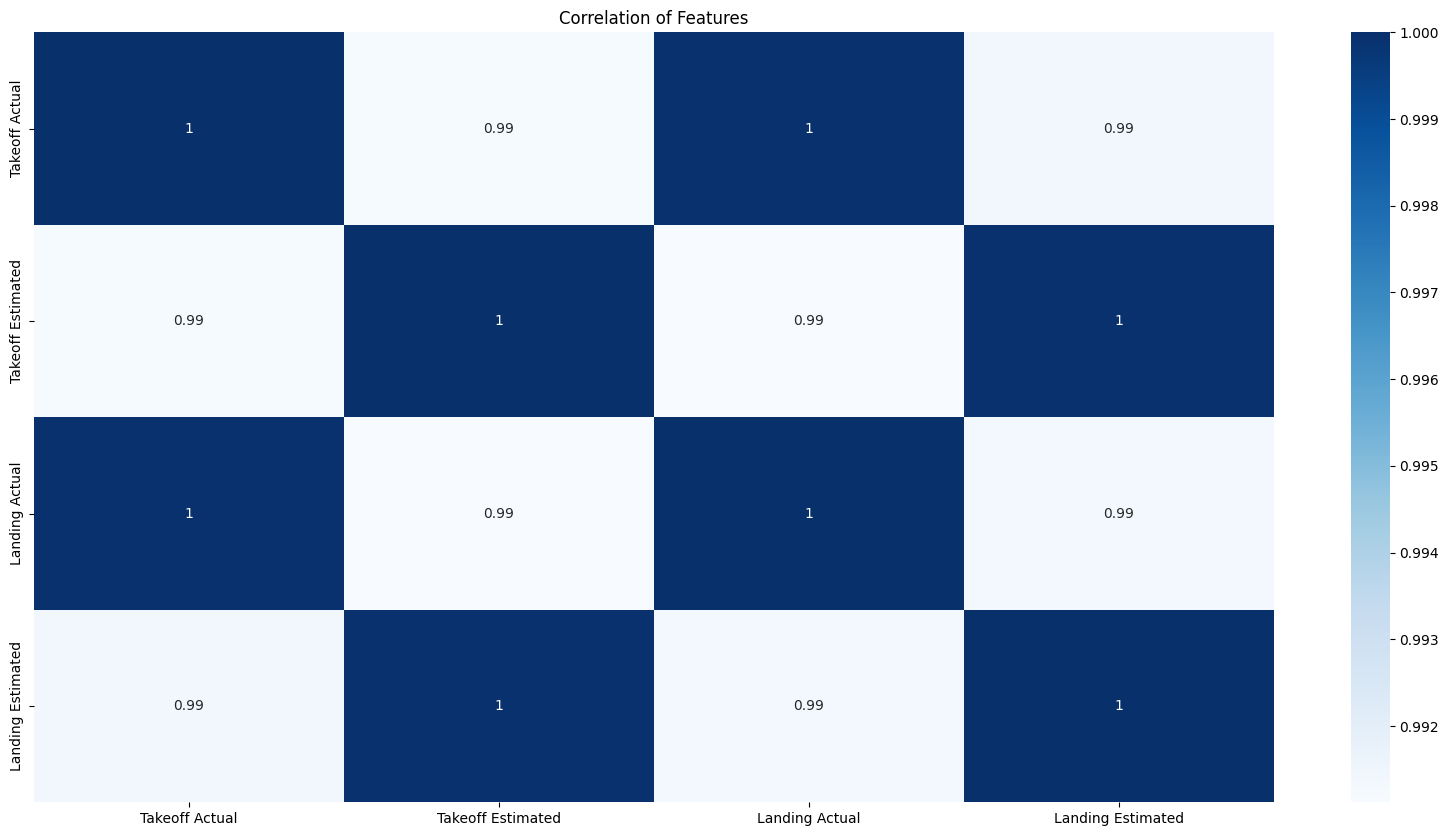

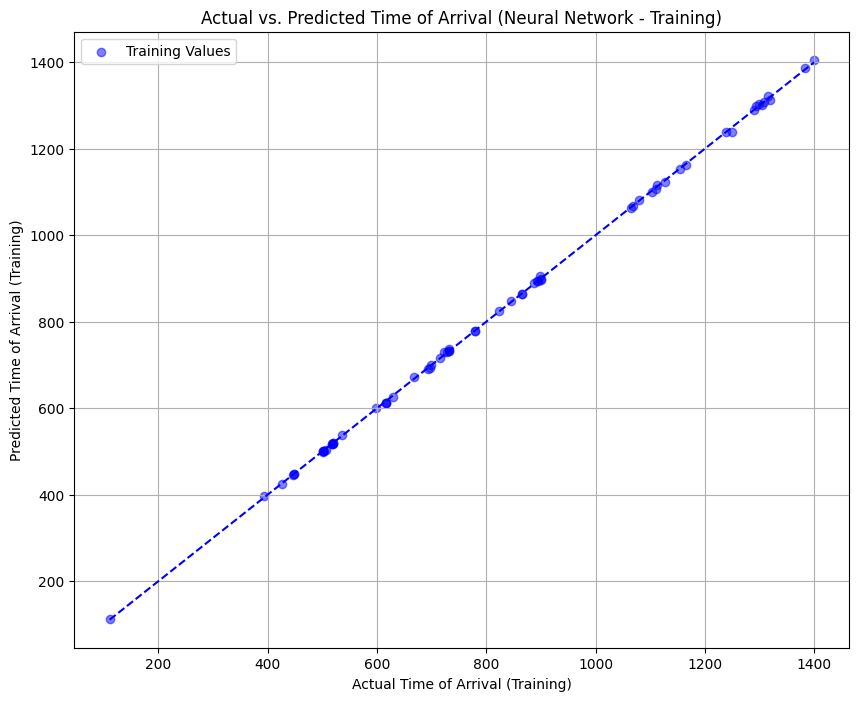

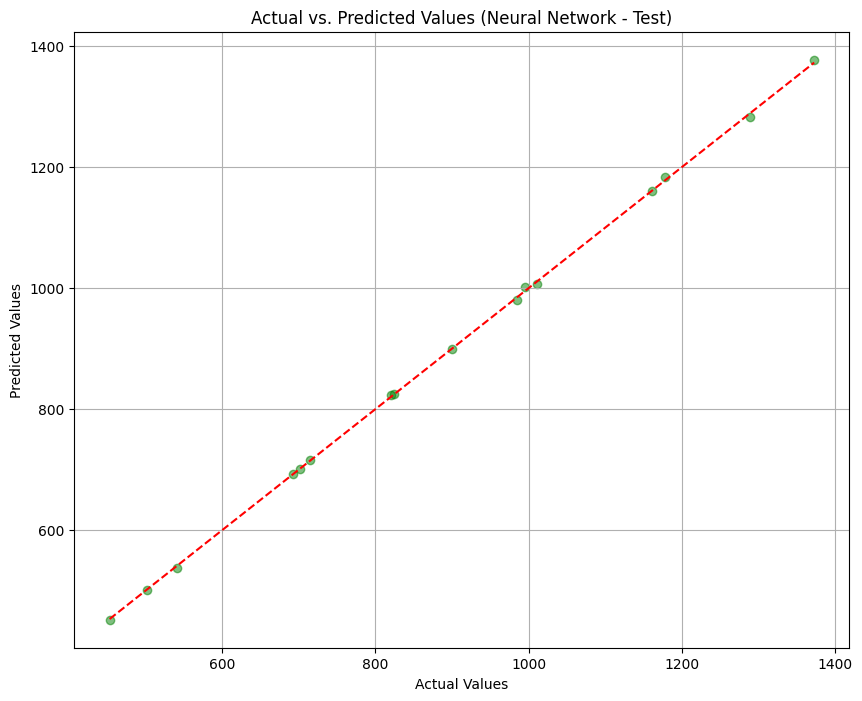

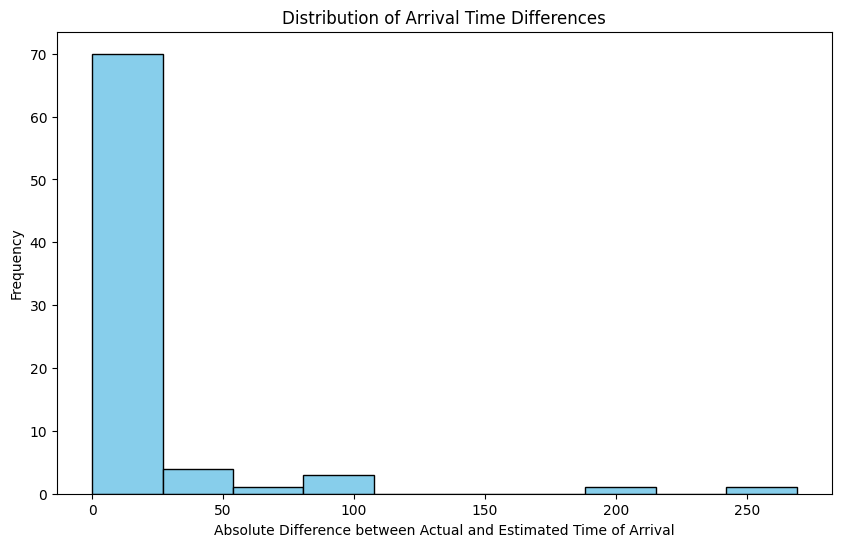

Mean difference: 18.2625
Maximum difference: 269
Minimum difference: 0


In [11]:

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df[features].corr(), annot=True, cmap='Blues')
plt.title("Correlation of Features")
plt.show()

# Plot actual vs. predicted values for training data
plt.figure(figsize=(10, 8))
plt.scatter(y_train, model(X_train_tensor).detach().numpy(), color='blue', alpha=0.5, label='Training Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='blue')  # Diagonal line
plt.xlabel("Actual Time of Arrival (Training)")
plt.ylabel("Predicted Time of Arrival (Training)")
plt.title("Actual vs. Predicted Time of Arrival (Neural Network - Training)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for test data
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_tensor.numpy(), color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network - Test)')
plt.grid(True)
plt.show()

# Calculate the absolute difference between actual and estimated time of arrival
df['Arrival_Time_Difference'] = np.abs(df['Landing Actual'] - df['Landing Estimated'])

# Visualize the difference
plt.figure(figsize=(10, 6))
plt.hist(df['Arrival_Time_Difference'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Absolute Difference between Actual and Estimated Time of Arrival')
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Time Differences')
plt.show()

# Analyze the difference
mean_difference = df['Arrival_Time_Difference'].mean()
max_difference = df['Arrival_Time_Difference'].max()
min_difference = df['Arrival_Time_Difference'].min()

print("Mean difference:", mean_difference)
print("Maximum difference:", max_difference)
print("Minimum difference:", min_difference)

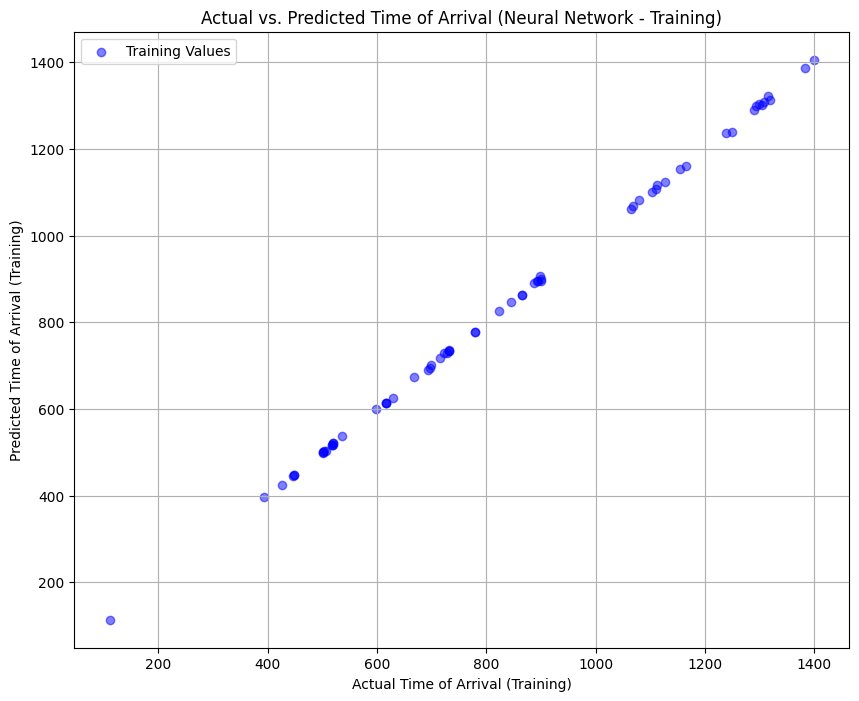

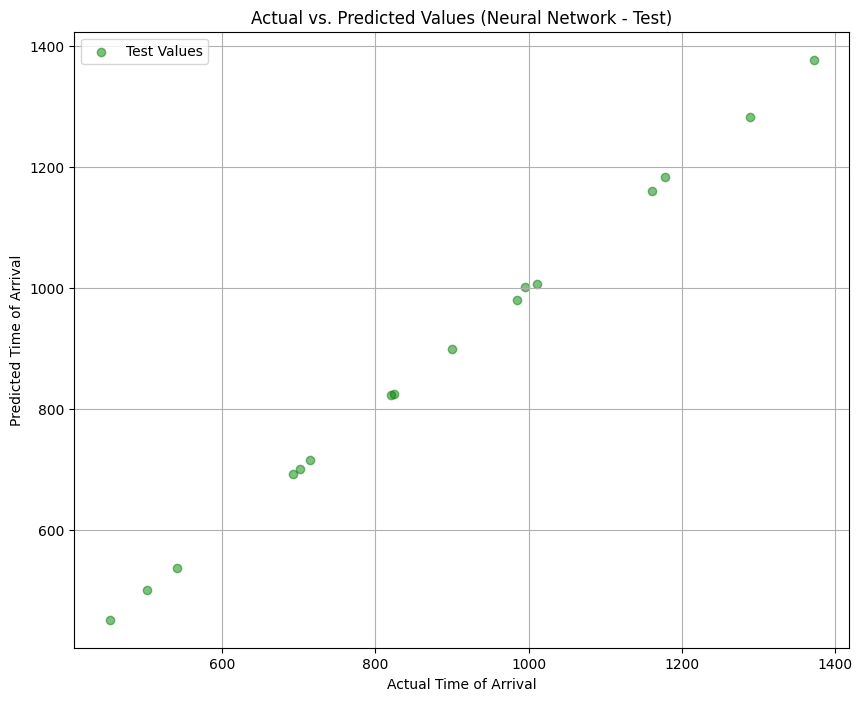

In [12]:
# Calculate predicted values for training and test data
predicted_train = model(X_train_tensor).detach().numpy().reshape(-1)
predicted_test = model(X_test_tensor).detach().numpy().reshape(-1)

# Plot actual vs. predicted values for training data
plt.figure(figsize=(10, 8))
plt.scatter(y_train, predicted_train, color='blue', alpha=0.5, label='Training Values')
plt.xlabel("Actual Time of Arrival (Training)")
plt.ylabel("Predicted Time of Arrival (Training)")
plt.title("Actual vs. Predicted Time of Arrival (Neural Network - Training)")
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted values for test data
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predicted_test, color='green', alpha=0.5, label='Test Values')
plt.xlabel('Actual Time of Arrival')
plt.ylabel('Predicted Time of Arrival')
plt.title('Actual vs. Predicted Values (Neural Network - Test)')
plt.legend()
plt.grid(True)
plt.show()


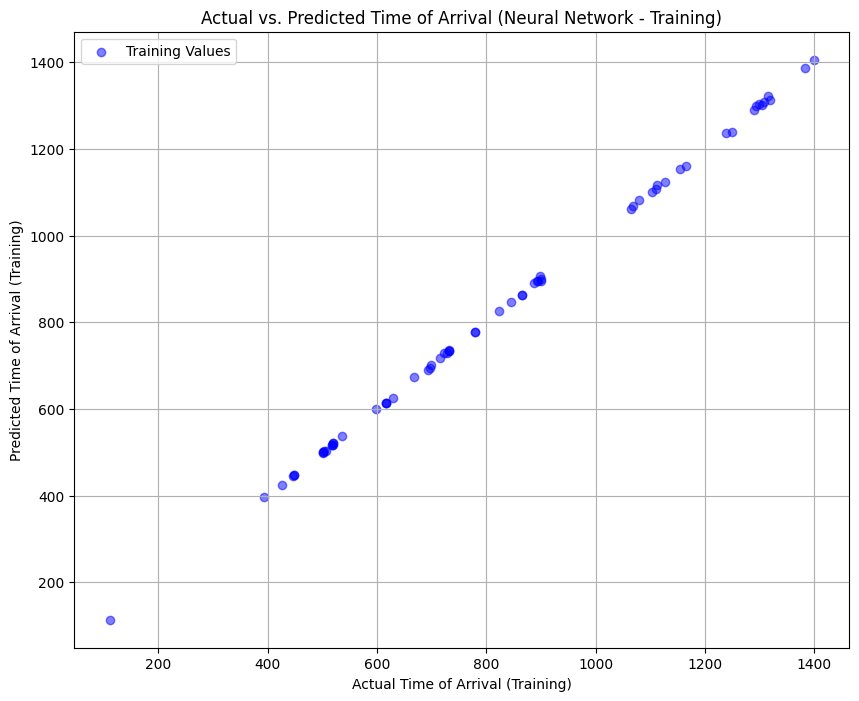

In [13]:
# Calculate predicted values for training and test data
predicted_train = model(X_train_tensor).detach().numpy().reshape(-1)
predicted_test = model(X_test_tensor).detach().numpy().reshape(-1)

# Plot actual vs. predicted values for training data
plt.figure(figsize=(10, 8))
plt.scatter(y_train, predicted_train, color='blue', alpha=0.5, label='Training Values')
plt.xlabel("Actual Time of Arrival (Training)")
plt.ylabel("Predicted Time of Arrival (Training)")
plt.title("Actual vs. Predicted Time of Arrival (Neural Network - Training)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert predicted values to numpy arrays
y_pred_train = model(X_train_tensor).detach().numpy().reshape(-1)
y_pred_test = model(X_test_tensor).detach().numpy().reshape(-1)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE) for training and test data
mse_train = mean_squared_error(y_train_tensor, torch.tensor(y_pred_train, dtype=torch.float32))
mae_train = mean_absolute_error(y_train_tensor, torch.tensor(y_pred_train, dtype=torch.float32))
mse_test = mean_squared_error(y_test_tensor, torch.tensor(y_pred_test, dtype=torch.float32))
mae_test = mean_absolute_error(y_test_tensor, torch.tensor(y_pred_test, dtype=torch.float32))

print("Mean Squared Error (MSE) - Train:", mse_train)
print("Mean Absolute Error (MAE) - Train:", mae_train)
print("Mean Squared Error (MSE) - Test:", mse_test)
print("Mean Absolute Error (MAE) - Test:", mae_test)


Mean Squared Error (MSE) - Train: 11.581505
Mean Absolute Error (MAE) - Train: 2.7116966
Mean Squared Error (MSE) - Test: 13.631801
Mean Absolute Error (MAE) - Test: 2.9555893


In [15]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_log_error, explained_variance_score

# R² Score (coefficient of determination) = 1 - (SS_res / SS_tot)
# Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# MAPE = (1/n) * Σ(|actual - predicted| / |actual|) * 100%
# Calculates the mean of the absolute percentage errors between the predicted and actual values 
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

# RMSLE(root mean squared logarithmic error) = √(1/n * Σ(log(1 + actual) - log(1 + predicted))^2)
# Calculates the square root of the mean of the squared logarithmic errors between the predicted and actual values, penalizing underestimation and overestimation equally.
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))

# Calculate Explained Variance Score = 1 - (Var(y_true - y_pred) / Var(y_true))
# Explained Variance Score measures the proportion to which a mathematical model accounts for the variation (dispersion) of a given data set.
explained_variance_train = explained_variance_score(y_train, y_pred_train)
explained_variance_test = explained_variance_score(y_test, y_pred_test)

print("R² Score (Train):", r2_train)
print("R² Score (Test):", r2_test)
print("MAPE (Train):", mape_train)
print("MAPE (Test):", mape_test)
print("RMSLE (Train):", rmsle_train)
print("RMSLE (Test):", rmsle_test)
print("Explained Variance Score (Train):", explained_variance_train)
print("Explained Variance Score (Test):", explained_variance_test)


R² Score (Train): 0.999878180747701
R² Score (Test): 0.9998120422059102
MAPE (Train): 0.0036343869396410758
MAPE (Test): 0.003266661256720855
RMSLE (Train): 0.004969194431379548
RMSLE (Test): 0.0038609172650758213
Explained Variance Score (Train): 0.9998782259998441
Explained Variance Score (Test): 0.9998122252502045
